In [1]:
# These are the imports of the McsData module
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_

# matplotlib.pyplot will be used in these examples to generate the plots visualizing the data
import matplotlib.pyplot as plt

# numpy is numpy ...
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import time

import os
start = time.time()

name = '2022-03-01T17-16-57McsRecording_C-00068.h5'
test_data_folder = os.path.abspath(os.getcwd())
channel_raw_data = McsPy.McsData.RawData(os.path.join(test_data_folder, name))

analog_stream_0 = channel_raw_data.recordings[0].analog_streams[0]

np_analog_stream_0_data = np.array(analog_stream_0.channel_data)


Fs = 10000
NN = np.arange(0,len(np_analog_stream_0_data[30]))
t = np.arange(0,len(np_analog_stream_0_data[30,NN])/Fs,1/Fs)

N = len(np_analog_stream_0_data[56,NN])

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

nrol=10
lent = 60
np_analog_stream_0_data[np.isnan(np_analog_stream_0_data)] = 0
means =np.zeros((len(np_analog_stream_0_data[:,0]),lent))
stds =np.zeros((len(np_analog_stream_0_data[:,0]),lent))
bbb =np.zeros((len(np_analog_stream_0_data[:,0]),len(NN)))


def my_function(MEAdataarray,i,lent):
    nrol=10
    data_rolled = np.std(rolling_window(MEAdataarray,nrol), 1)
    data_rol = np.roll(np.append(data_rolled,np.zeros(nrol-1)),int(nrol/2))
    bb = ( abs(data_rol)>2.5*np.sum(data_rol)/len(data_rol))
    bb[bb>0]=1
    a = []
    countt = 0
    j=1
    b = np.zeros(shape=[lent, 1])
    while j < len(MEAdataarray):
        

        if j==1:
            j
        else:
            if bb[j]==True and bb[j-1]==False :
                
                if sum(abs(MEAdataarray[j-10:j+lent-10]))<1000:

                    b = np.c_[b,MEAdataarray[j-10:j+lent-10]]
                    countt += 1
                    a = np.append(a,j)
                    j += lent
        j += 1
    print(i)
    return a,b,data_rol


from joblib import Parallel, delayed
if __name__ == "__main__":
    result = Parallel(n_jobs=6)(delayed(my_function)(1e-2*np_analog_stream_0_data[i,NN],i,lent) for i in range(60))
for i in range(len(np_analog_stream_0_data[:,0])):
    
    globals()[f"a{i}".format(i)] = np.array(result[i][0])
    globals()[f"dataextract{i}".format(i)] = np.array(result[i][1])
    means[i,:] = globals()[f"dataextract{i}".format(i)].mean(1)
    stds[i,:] = globals()[f"dataextract{i}".format(i)].std(1)   
    bbb[i,:] = result[i][2]
end = time.time()
print(end - start)

Recording_0 <HDF5 group "/Data/Recording_0" (1 members)>
Stream_0 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (60, 866000), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (60,), type "|V108">
6.767559051513672


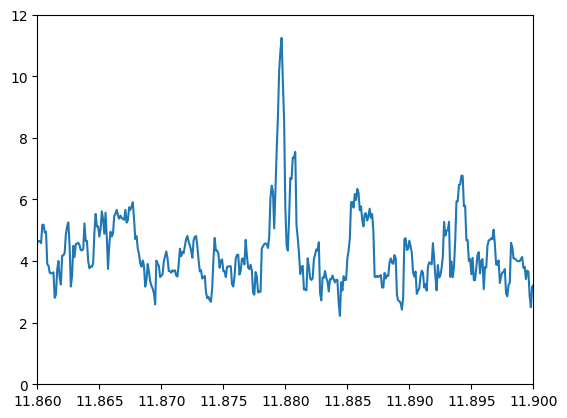

In [2]:
plt.plot(t,bbb[32,:])
plt.xlim([11.86,11.9])
plt.ylim([0,12])
plt.show()

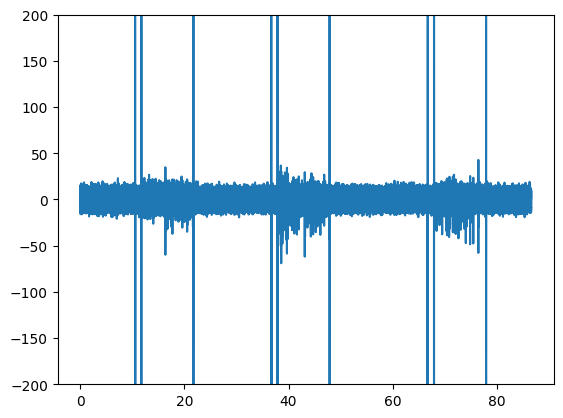

In [3]:

plt.plot(t,1e-2*np_analog_stream_0_data[32,:])
#plt.xlim([11.728,11.75])
plt.ylim([-200,200])

plt.show()


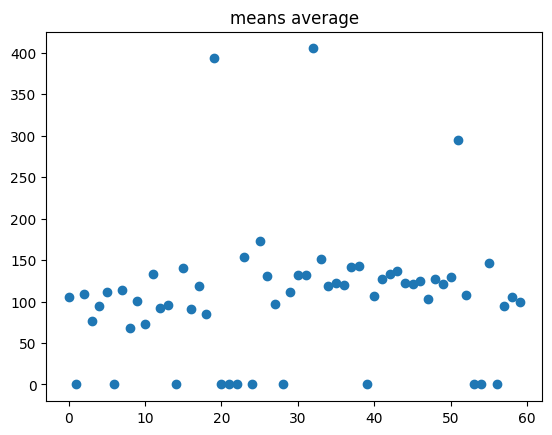

In [4]:
plt.scatter(np.arange(len(np.abs(means).sum(1))),np.abs(means).sum(1))
plt.title('means average')
plt.show()
Nmeanslow = 1
Nmeanshigh = []

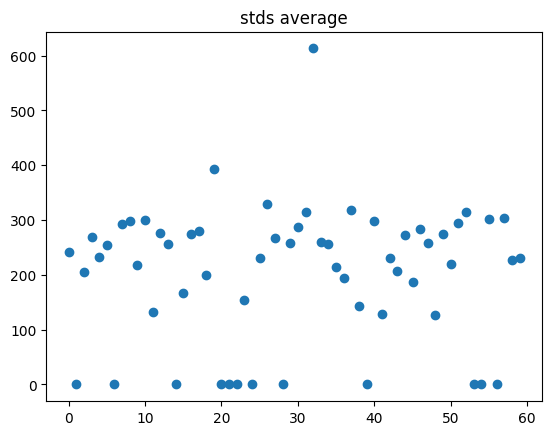

In [5]:
plt.scatter(np.arange(len(np.abs(stds).sum(1))),np.abs(stds).sum(1))
plt.title('stds average')
plt.show()
Nstdslow = 1
Nstdshigh = []

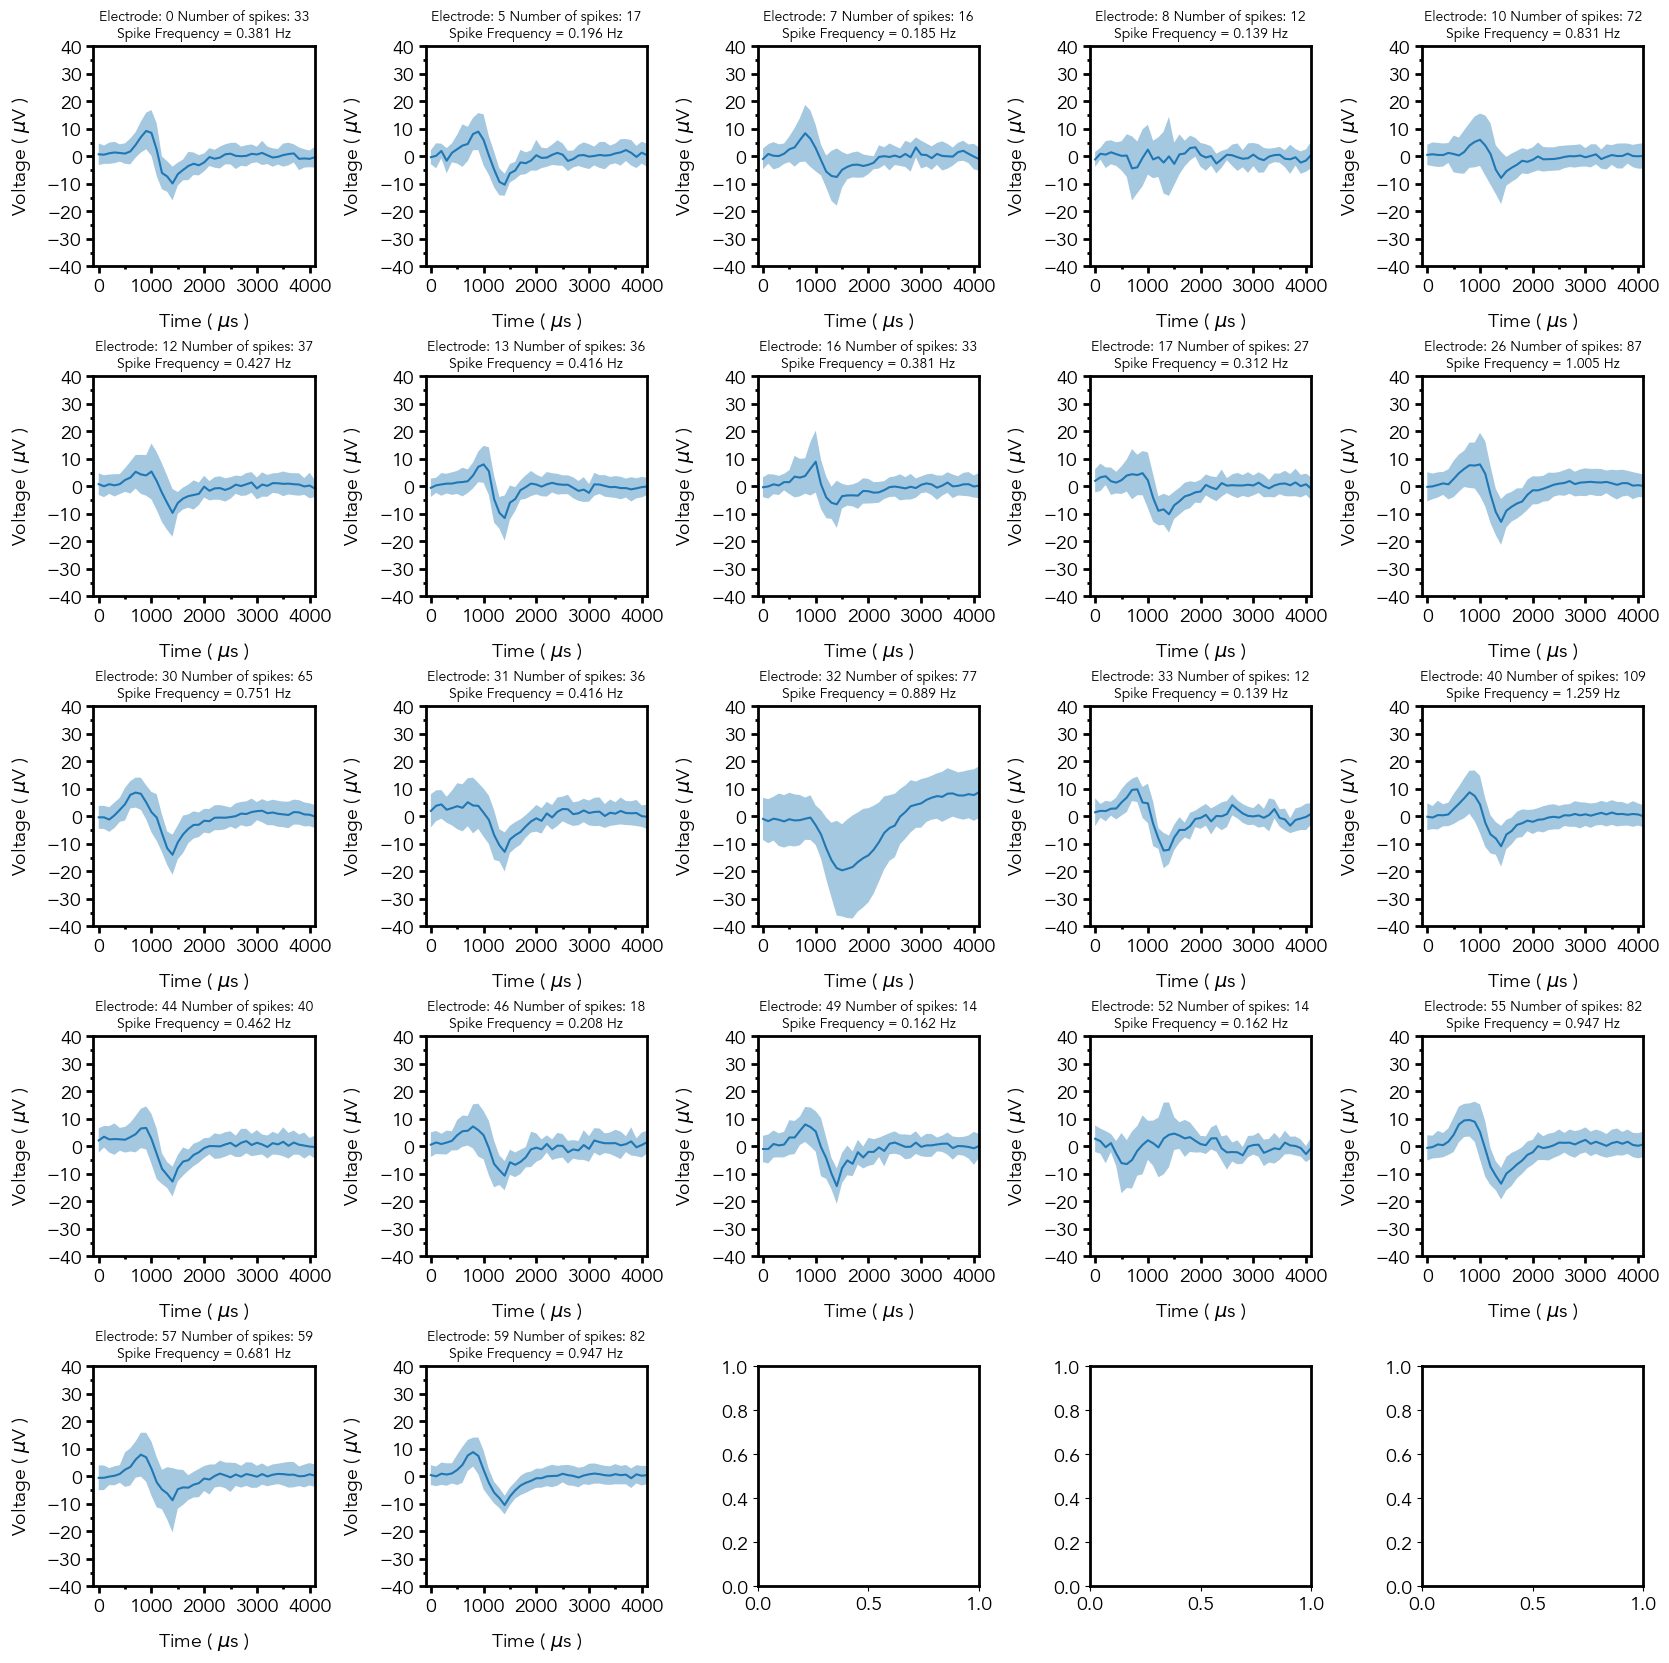

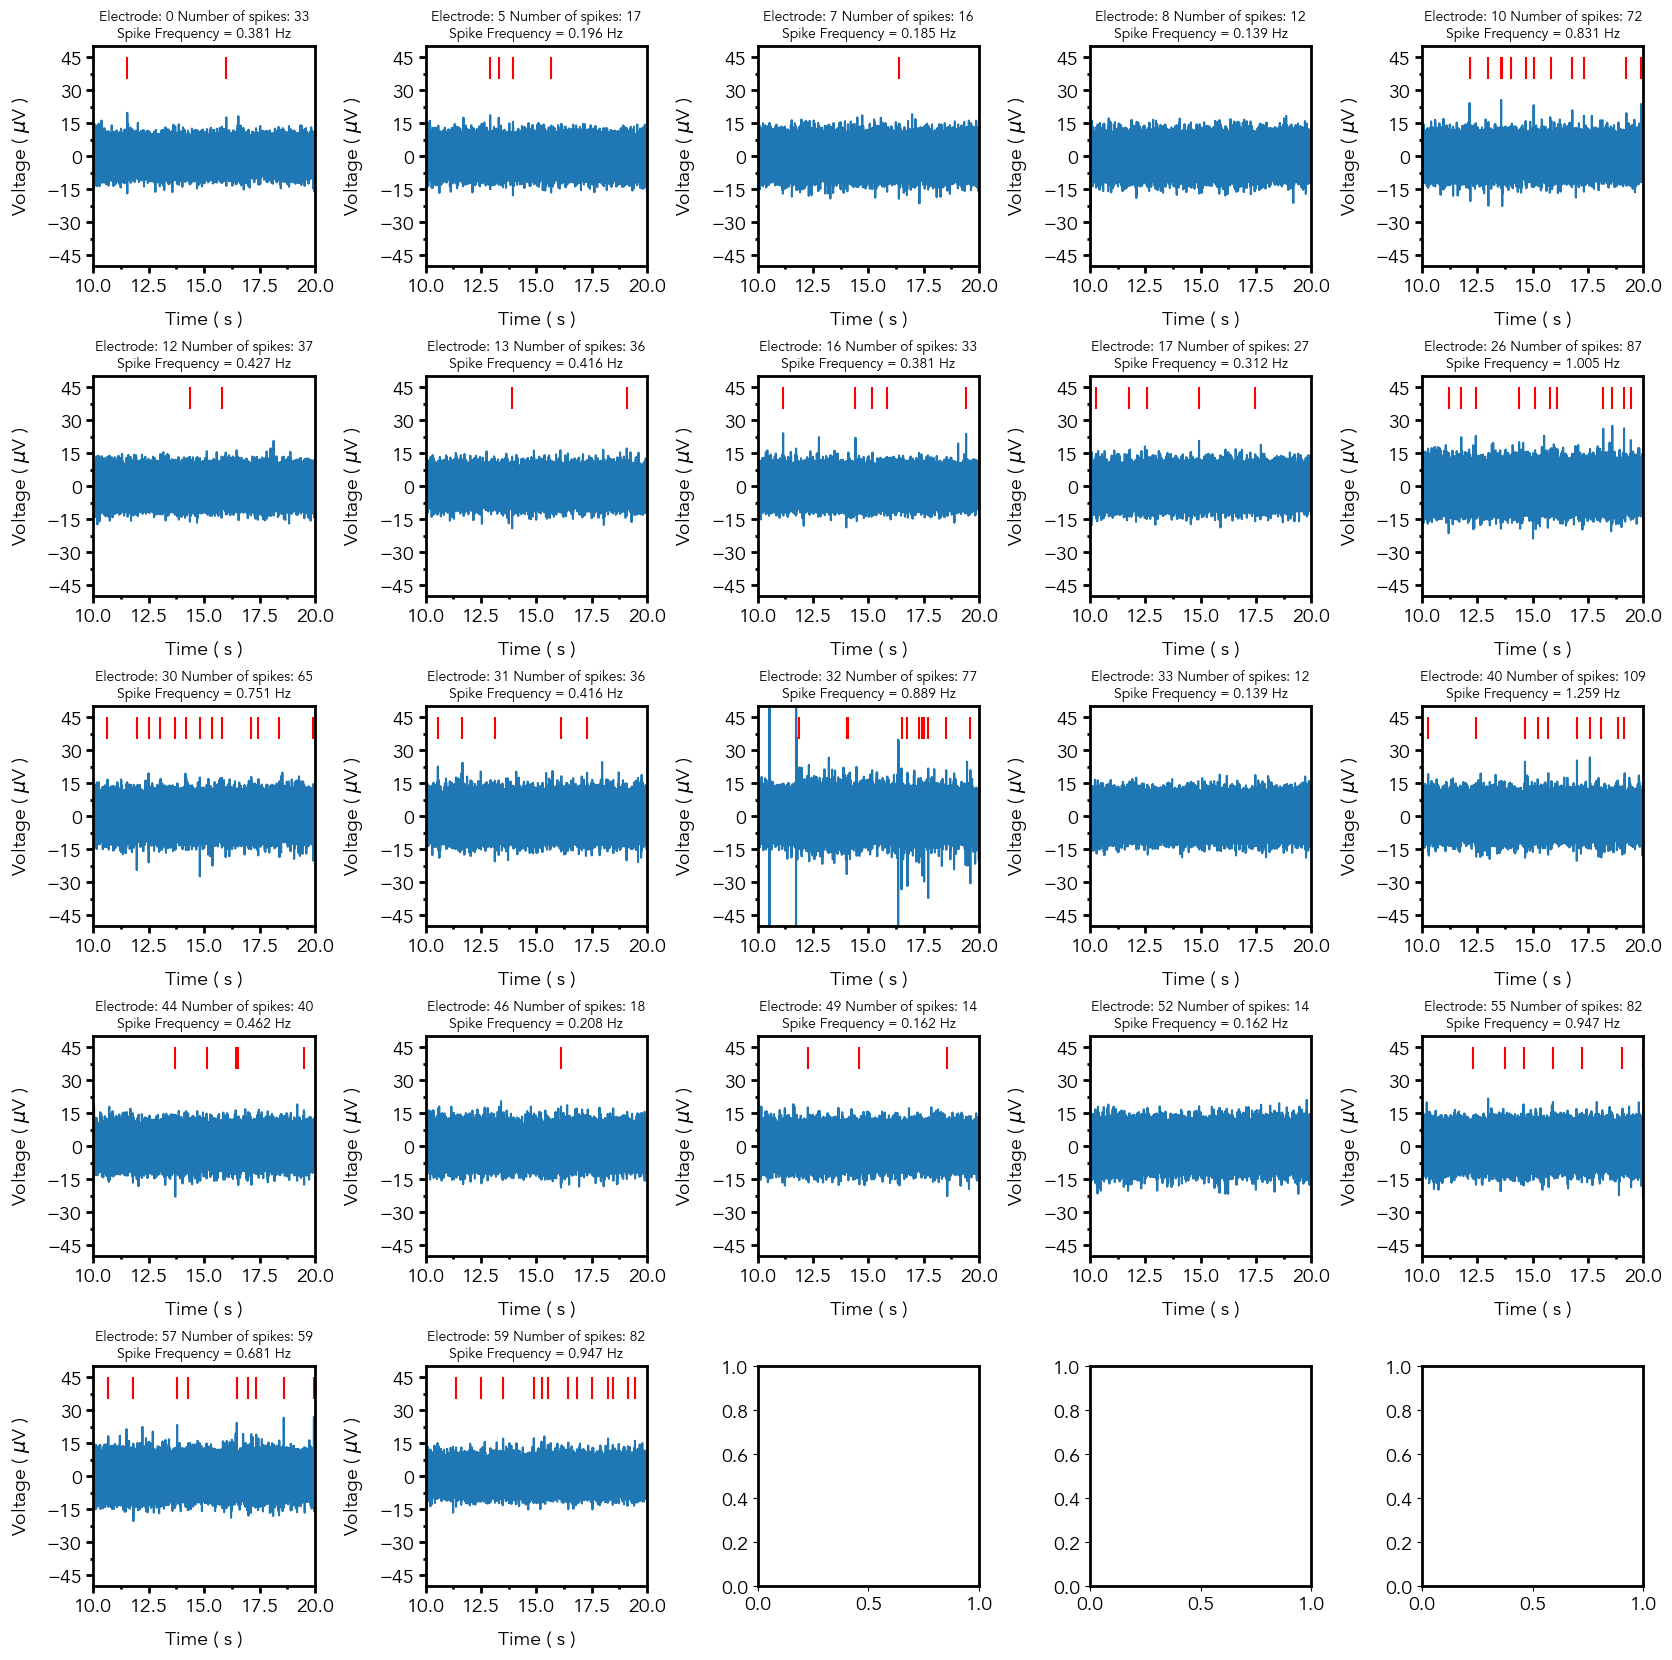

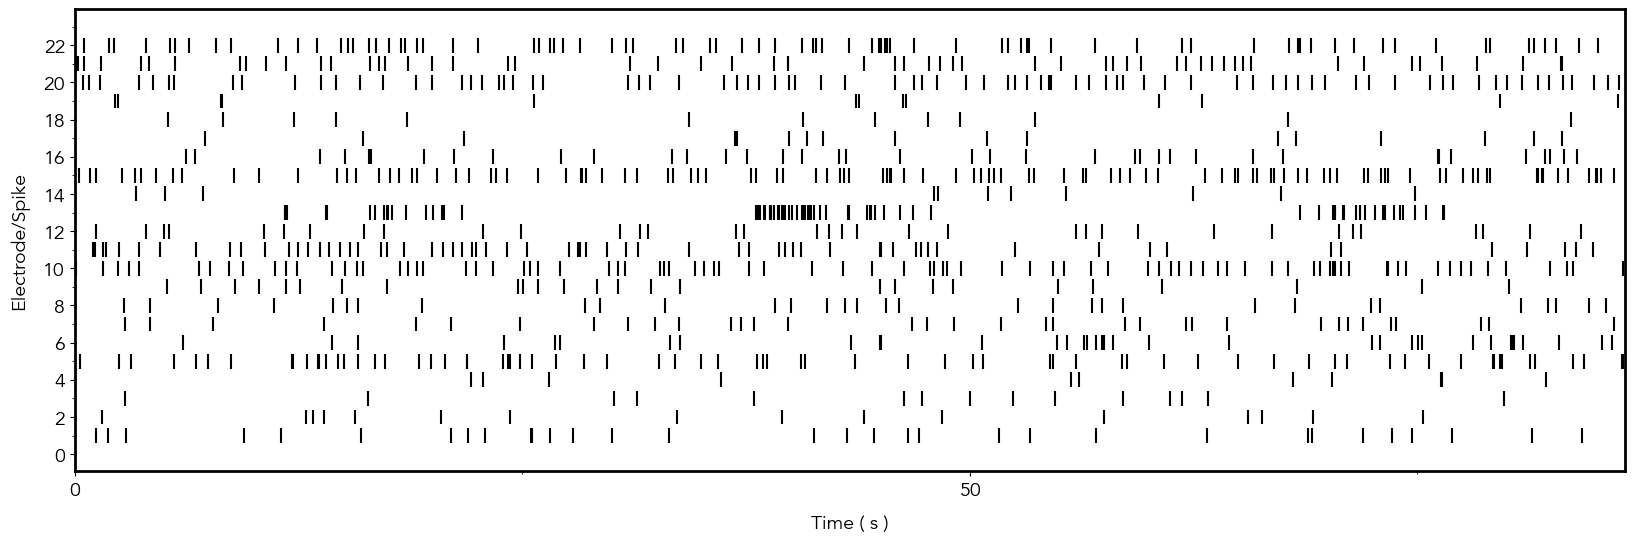

5.776020050048828


In [95]:
from pylab import cm
import matplotlib.font_manager as fm
import matplotlib as mpl

start = time.time()
plotsize = 5
fig, ax = plt.subplots(plotsize,plotsize, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax = ax.ravel()

fig1, ax1 = plt.subplots(plotsize,plotsize, figsize=(20, 20))
fig1.subplots_adjust(hspace = .5, wspace=.5)
ax1 = ax1.ravel()

fig2, ax2 = plt.subplots(1,1, figsize=(20, 6))


electrode = 0
ts = 1000000*np.arange(0,len(globals()[f"dataextract{electrode}".format(electrode)][:,0])/Fs,1/Fs)
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)
count = 0
for i in range(60):
    electrode = i
    if globals()[f"dataextract{electrode}".format(electrode)].size and np.abs(means).sum(1)[i]>Nmeanslow and np.abs(stds).sum(1)[i]>Nstdslow and np.abs(stds).sum(1)[i]<40000 and len(globals()[f"dataextract{electrode}".format(electrode)].T)>10:
        
        ax[count].plot(ts,means[electrode,:])
        ax[count].xaxis.set_tick_params(which='major', size=5, width=2, direction='out', bottom='on')
        ax[count].xaxis.set_tick_params(which='minor', size=2, width=2, direction='out', bottom='on')
        ax[count].yaxis.set_tick_params(which='major', size=5, width=2, direction='out', left='on')
        ax[count].yaxis.set_tick_params(which='minor', size=2, width=2, direction='out', left='on')

        ax[count].fill_between(ts,means[electrode,:]-stds[electrode,:]
                         ,means[electrode,:]+stds[electrode,:],alpha=0.4)
        ax[count].xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
        ax[count].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))
        ax[count].yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
        ax[count].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
        ax[count].set_xlabel('Time ( $\mu$s )', labelpad=10)
        ax[count].set_ylabel('Voltage ( $\mu$V )', labelpad=10)
        ax[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 10)
        ax[count].set_ylim(-40,40)
        ax[count].set_xlim(-100,4100)
        
        
        ax1[count].eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 40,color='red',linelengths = 10)
        ax1[count].plot(t,1e-2*np_analog_stream_0_data[electrode,NN])
        ax1[count].xaxis.set_tick_params(which='major', size=5, width=2, direction='out', bottom='on')
        ax1[count].xaxis.set_tick_params(which='minor', size=2, width=2, direction='out', bottom='on')
        ax1[count].yaxis.set_tick_params(which='major', size=5, width=2, direction='out', left='on')
        ax1[count].yaxis.set_tick_params(which='minor', size=2, width=2, direction='out', left='on')
        ax1[count].xaxis.set_major_locator(mpl.ticker.MultipleLocator(2.5))
        ax1[count].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.25))
        ax1[count].yaxis.set_major_locator(mpl.ticker.MultipleLocator(15))
        ax1[count].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(7.5))
        ax1[count].set_xlabel('Time ( s )', labelpad=10)
        ax1[count].set_ylabel('Voltage ( $\mu$V )', labelpad=10)
        ax1[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 10)
        ax1[count].set_ylim(-50,50)
        ax1[count].set_xlim(10,20)
        
        ax2.eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 1+1*count,color='black',linelengths = 0.8)
        ax2.set_xlabel('Time ( s )', labelpad=10)
        ax2.set_ylabel('Electrode/Spike', labelpad=10)
        ax2.set_xlim([0,max(t)])
        ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
        ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
        ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
        ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))        
        count = count+1
plt.show()
fig.savefig('blaaa.pdf')
fig1.savefig('blaaa1.pdf')
fig2.savefig('blaaa2.pdf')

end = time.time()
print(end - start)

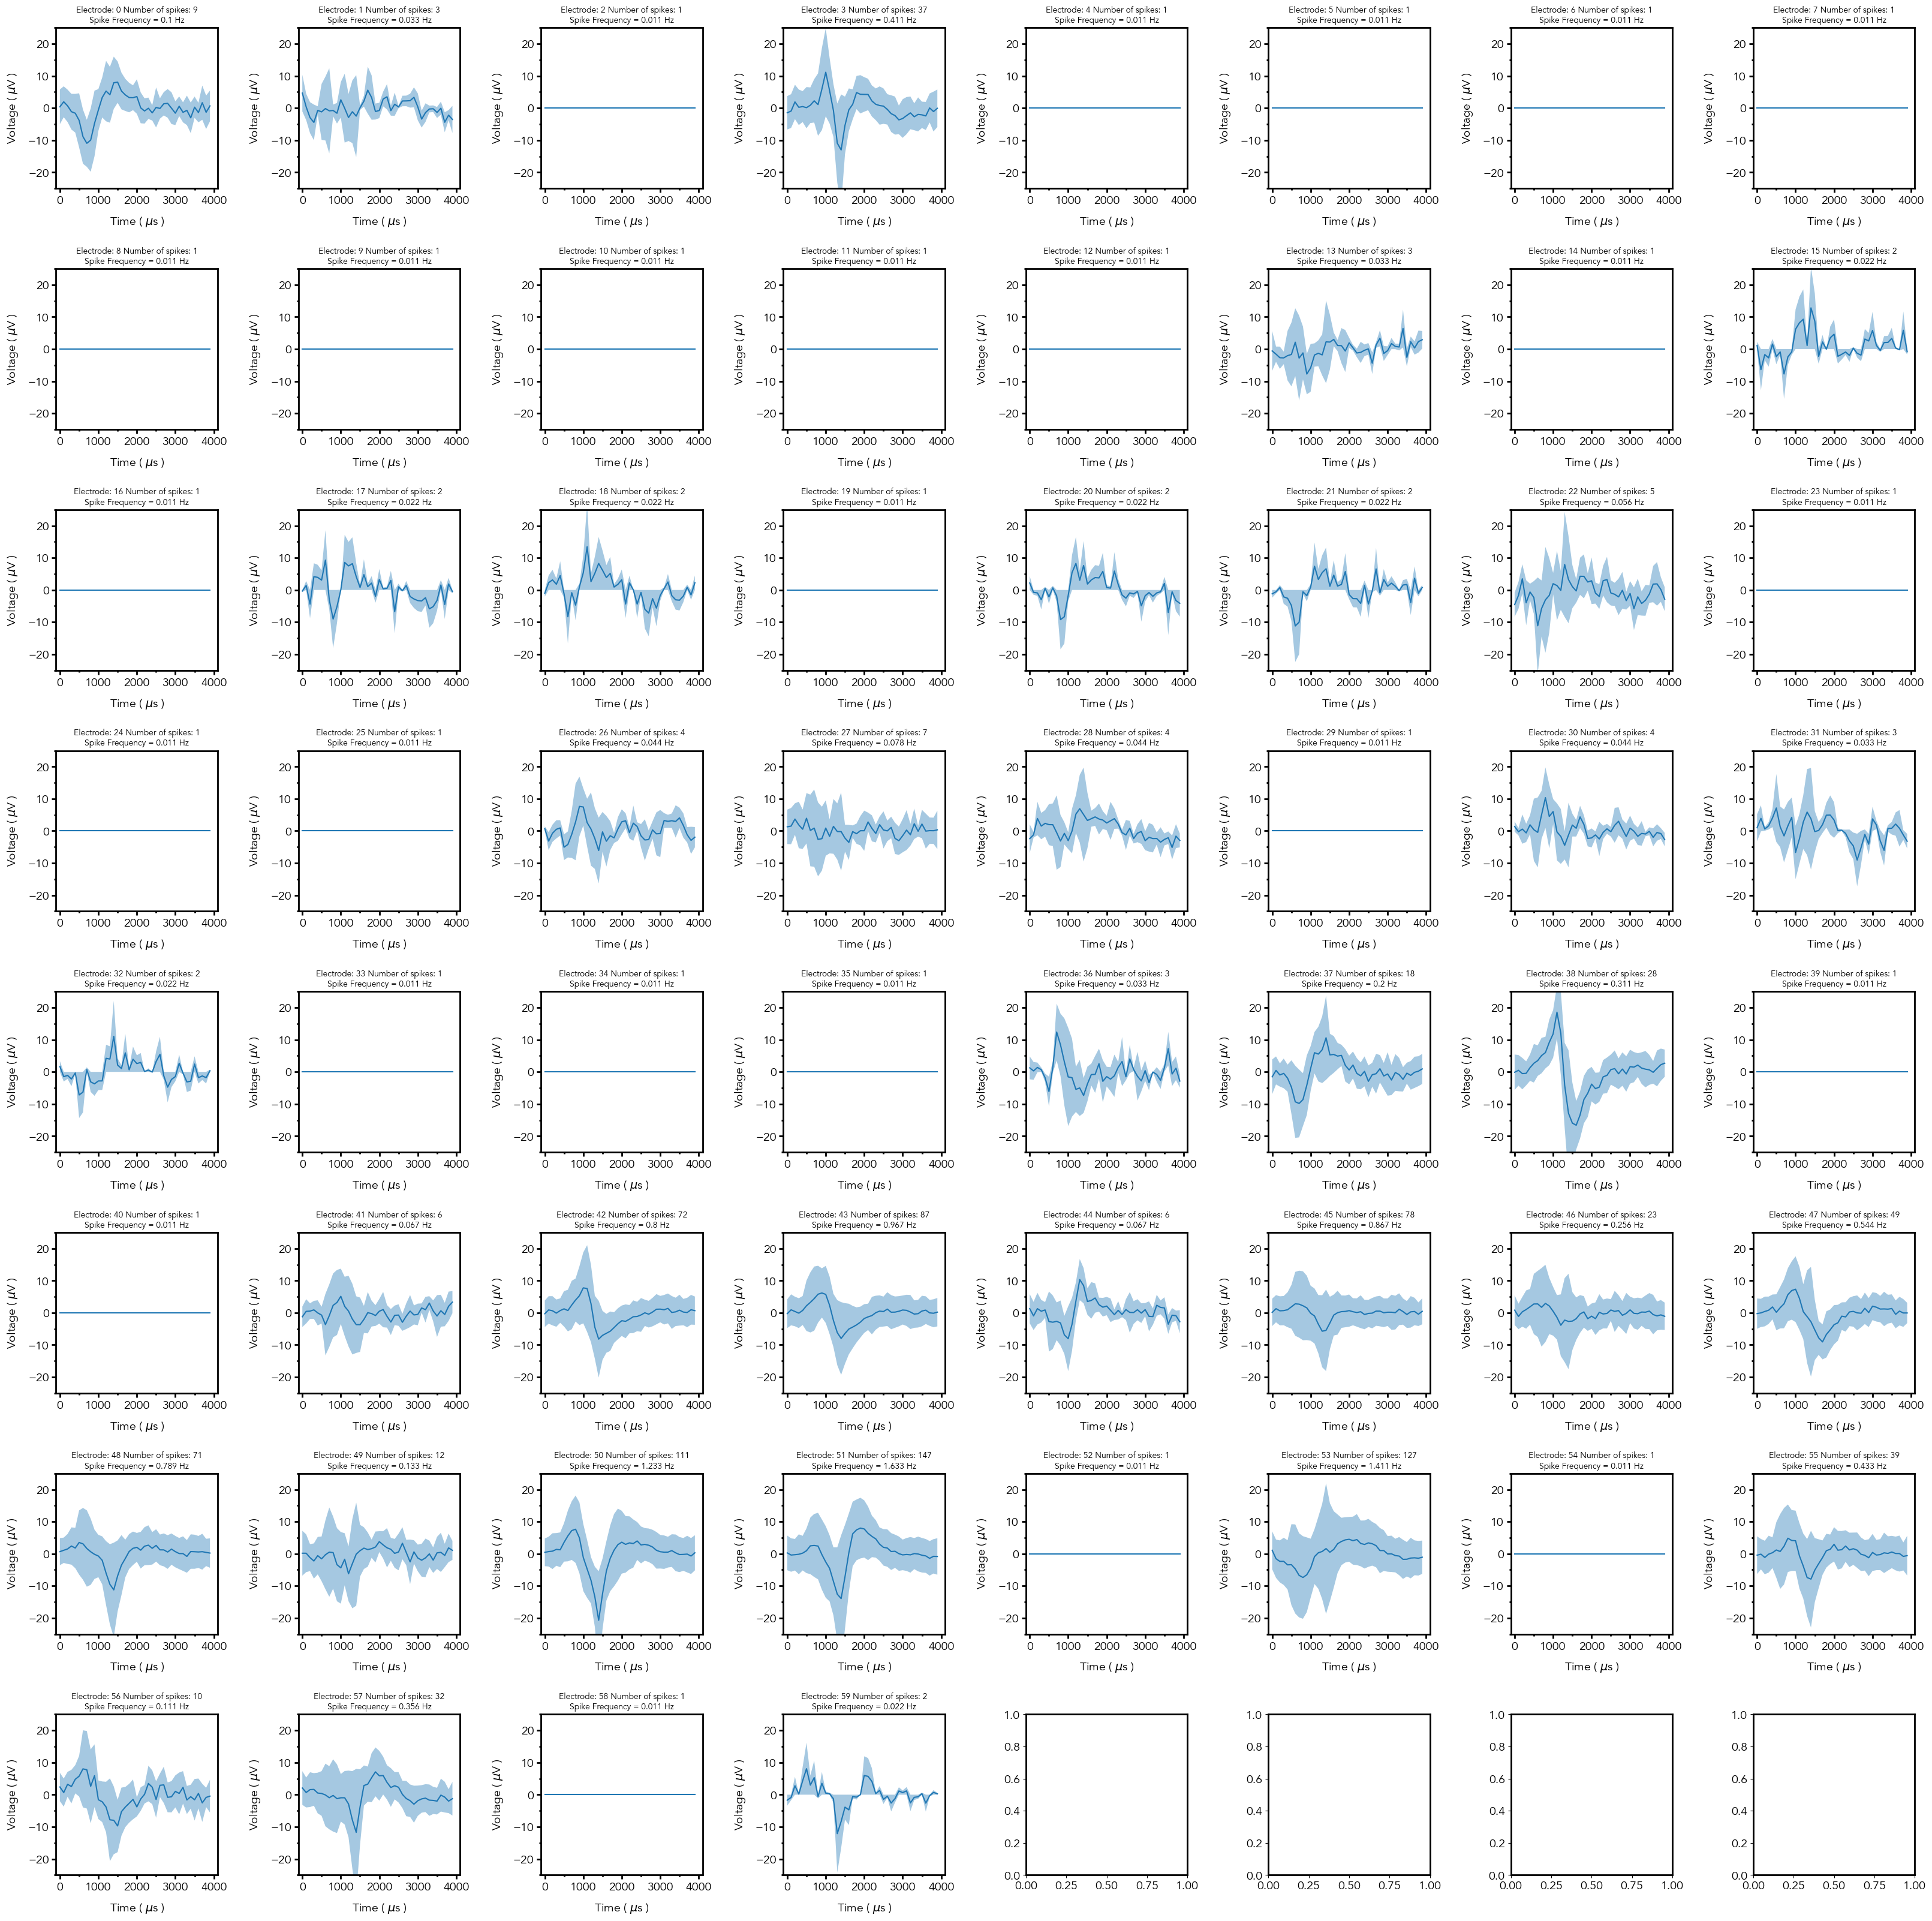

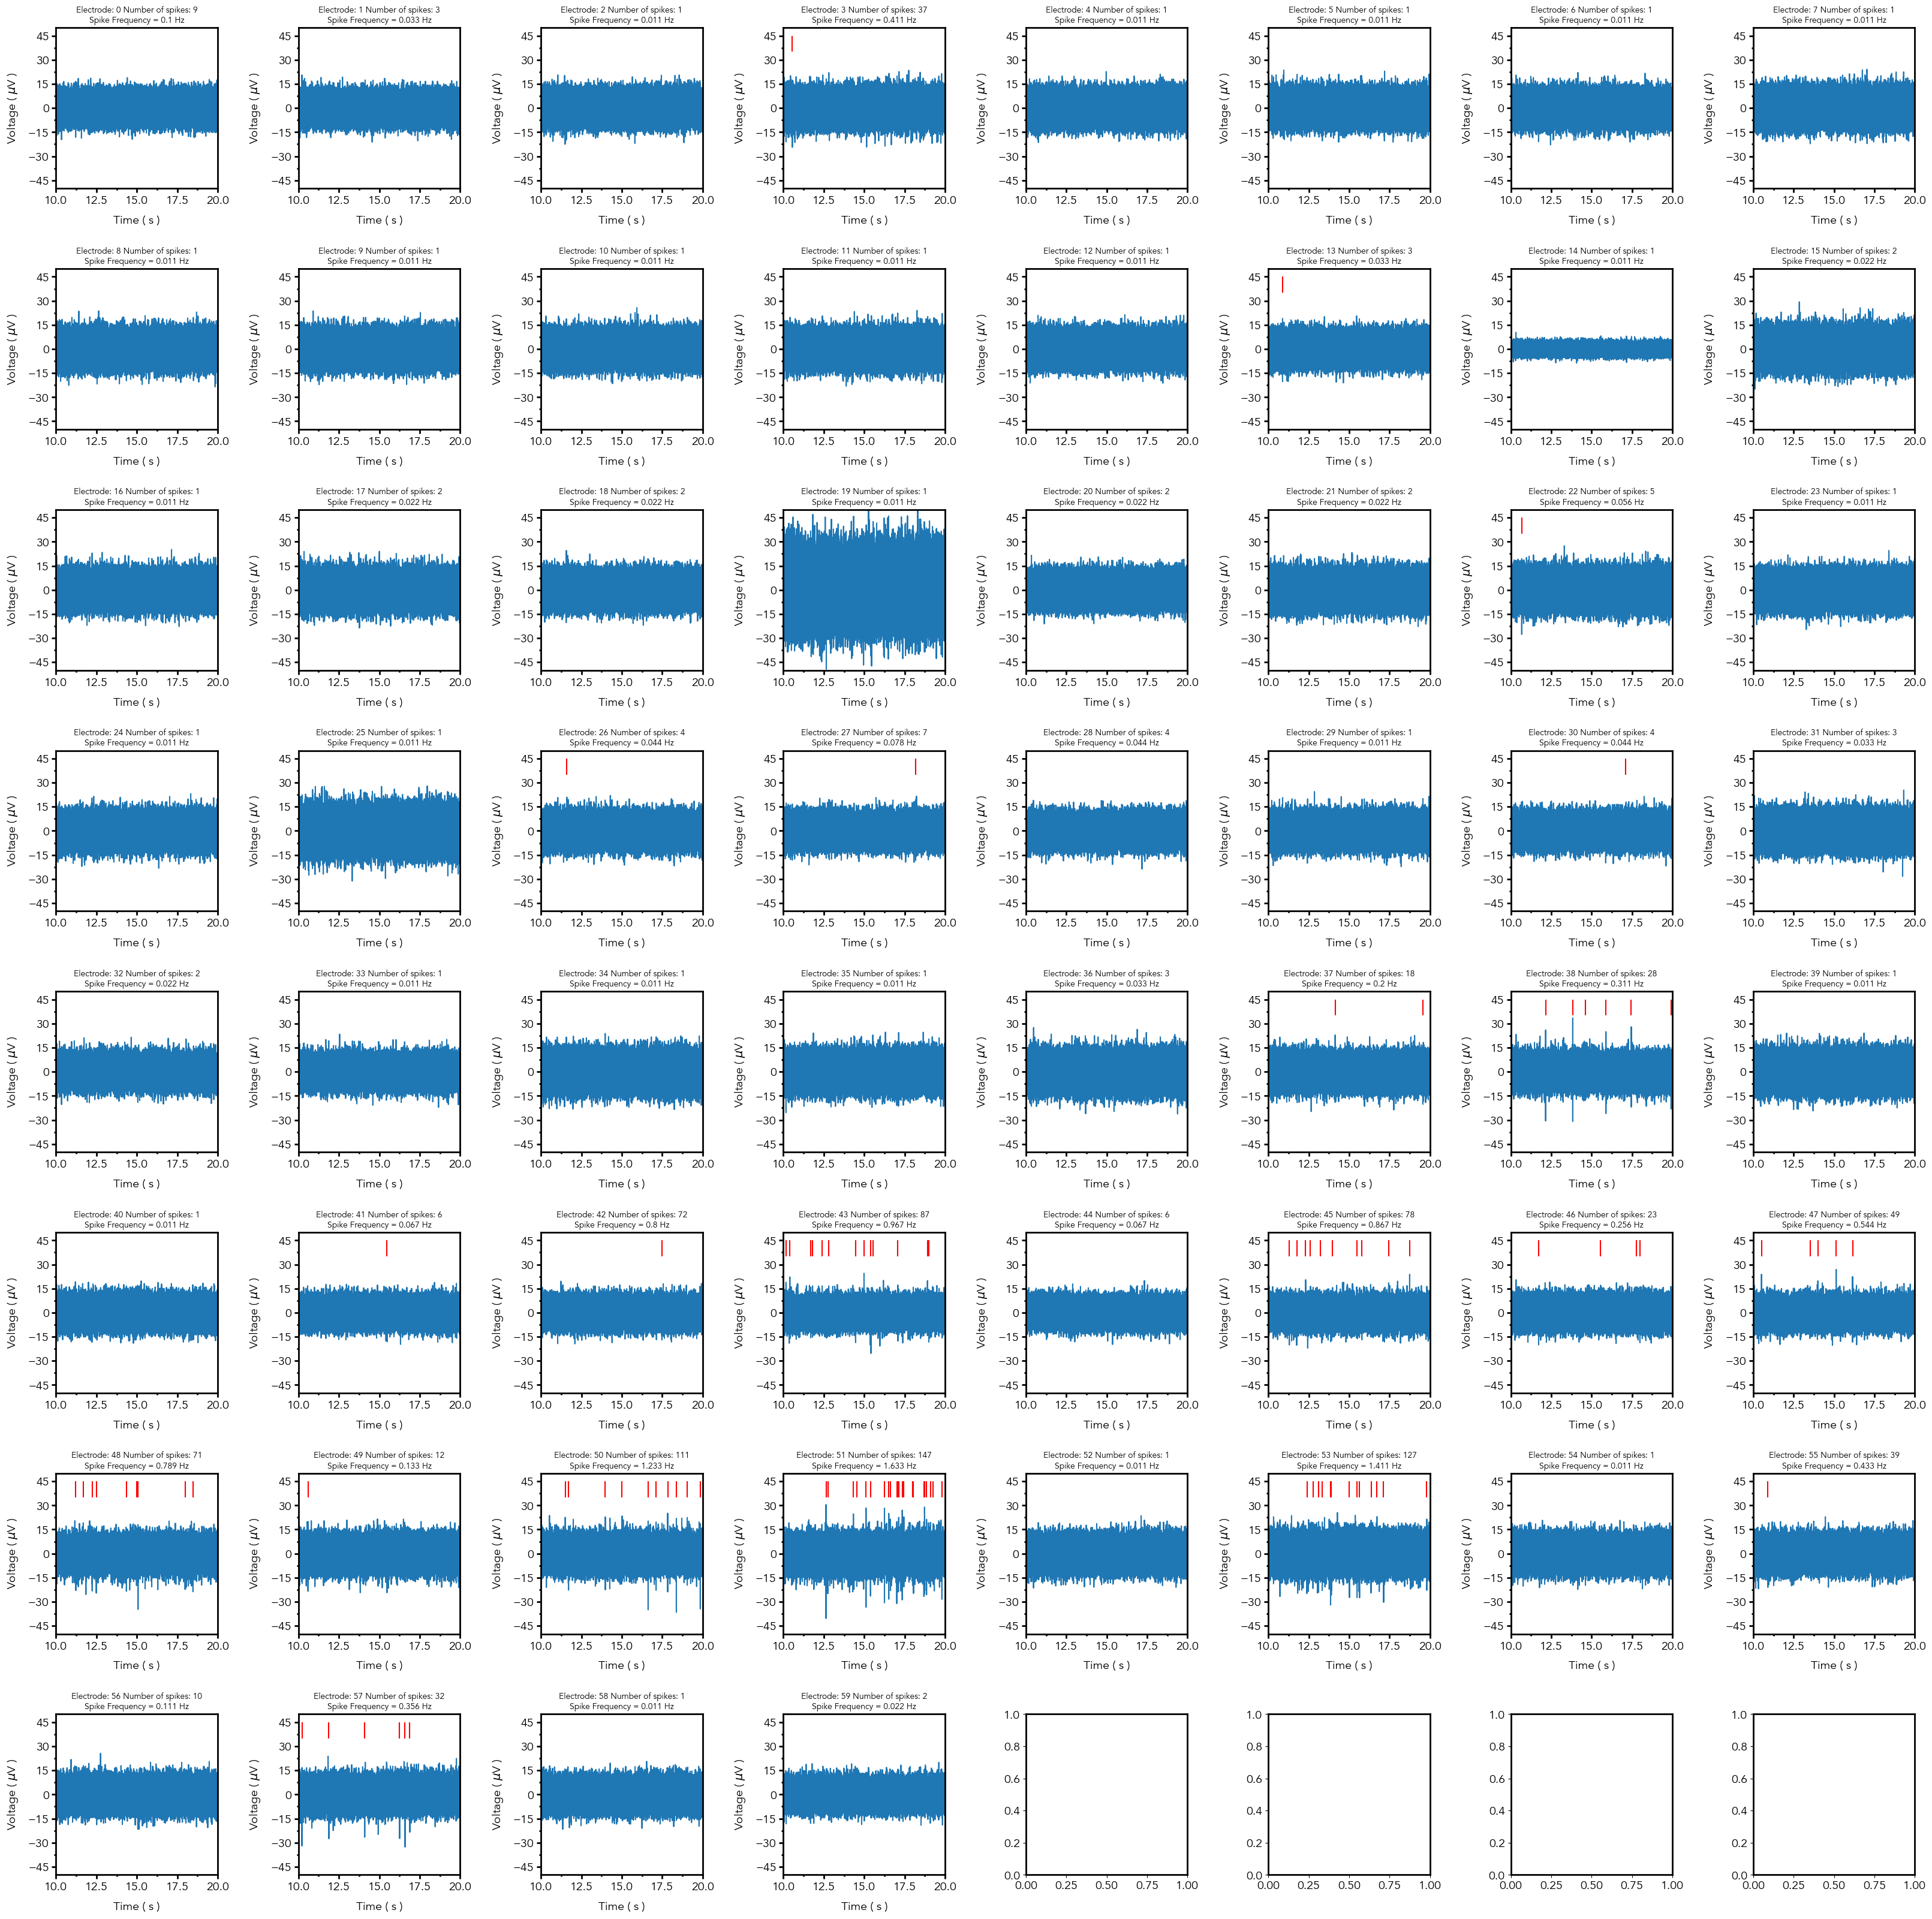

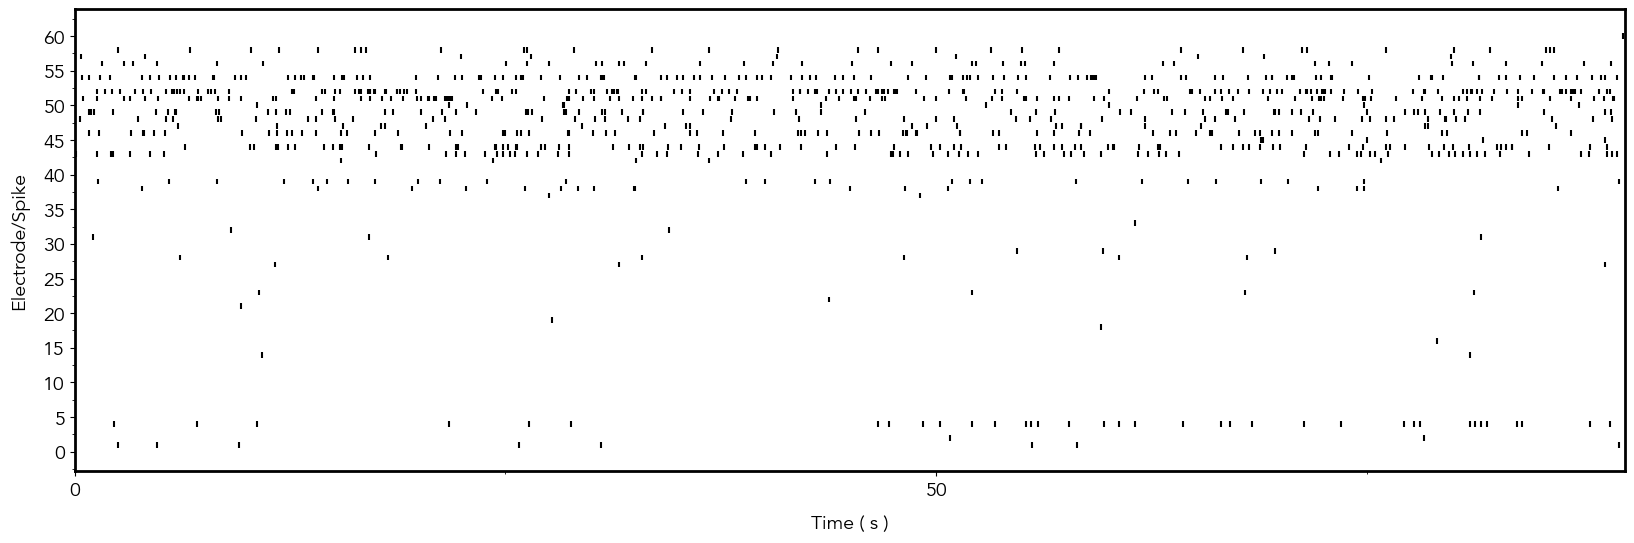

15.561241149902344


In [5]:
from pylab import cm
import matplotlib.font_manager as fm
import matplotlib as mpl

start = time.time()

fig, ax = plt.subplots(8,8, figsize=(40, 40))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax = ax.ravel()

fig1, ax1 = plt.subplots(8,8, figsize=(40, 40))
fig1.subplots_adjust(hspace = .5, wspace=.5)
ax1 = ax1.ravel()

fig2, ax2 = plt.subplots(1,1, figsize=(20, 6))


electrode = 0
ts = 1000000*np.arange(0,len(globals()[f"dataextract{electrode}".format(electrode)][:,0])/Fs,1/Fs)
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)
count = 0
for i in range(60):
    electrode = i
    if globals()[f"dataextract{electrode}".format(electrode)].size:
        
        ax[count].plot(ts,means[electrode,:])
        ax[count].xaxis.set_tick_params(which='major', size=5, width=2, direction='out', bottom='on')
        ax[count].xaxis.set_tick_params(which='minor', size=2, width=2, direction='out', bottom='on')
        ax[count].yaxis.set_tick_params(which='major', size=5, width=2, direction='out', left='on')
        ax[count].yaxis.set_tick_params(which='minor', size=2, width=2, direction='out', left='on')

        ax[count].fill_between(ts,means[electrode,:]-stds[electrode,:]
                         ,means[electrode,:]+stds[electrode,:],alpha=0.4)
        ax[count].xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
        ax[count].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))
        ax[count].yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
        ax[count].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
        ax[count].set_xlabel('Time ( $\mu$s )', labelpad=10)
        ax[count].set_ylabel('Voltage ( $\mu$V )', labelpad=10)
        ax[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 10)
        ax[count].set_ylim(-25,25)
        ax[count].set_xlim(-100,4100)
        
        
        ax1[count].eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 40,color='red',linelengths = 10)
        ax1[count].plot(t,1e-2*np_analog_stream_0_data[electrode,0:90*Fs])
        ax1[count].xaxis.set_tick_params(which='major', size=5, width=2, direction='out', bottom='on')
        ax1[count].xaxis.set_tick_params(which='minor', size=2, width=2, direction='out', bottom='on')
        ax1[count].yaxis.set_tick_params(which='major', size=5, width=2, direction='out', left='on')
        ax1[count].yaxis.set_tick_params(which='minor', size=2, width=2, direction='out', left='on')
        ax1[count].xaxis.set_major_locator(mpl.ticker.MultipleLocator(2.5))
        ax1[count].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.25))
        ax1[count].yaxis.set_major_locator(mpl.ticker.MultipleLocator(15))
        ax1[count].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(7.5))
        ax1[count].set_xlabel('Time ( s )', labelpad=10)
        ax1[count].set_ylabel('Voltage ( $\mu$V )', labelpad=10)
        ax1[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 10)
        ax1[count].set_ylim(-50,50)
        ax1[count].set_xlim(10,20)
        
        ax2.eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 1+1*count,color='black',linelengths = 0.8)
        ax2.set_xlabel('Time ( s )', labelpad=10)
        ax2.set_ylabel('Electrode/Spike', labelpad=10)
        ax2.set_xlim([0,max(t)])
        ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
        ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
        ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
        ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))        
    count = count+1
plt.show()
fig.savefig('blaa.pdf')
fig1.savefig('blaa1.pdf')
fig2.savefig('blaa2.pdf')

end = time.time()
print(end - start)

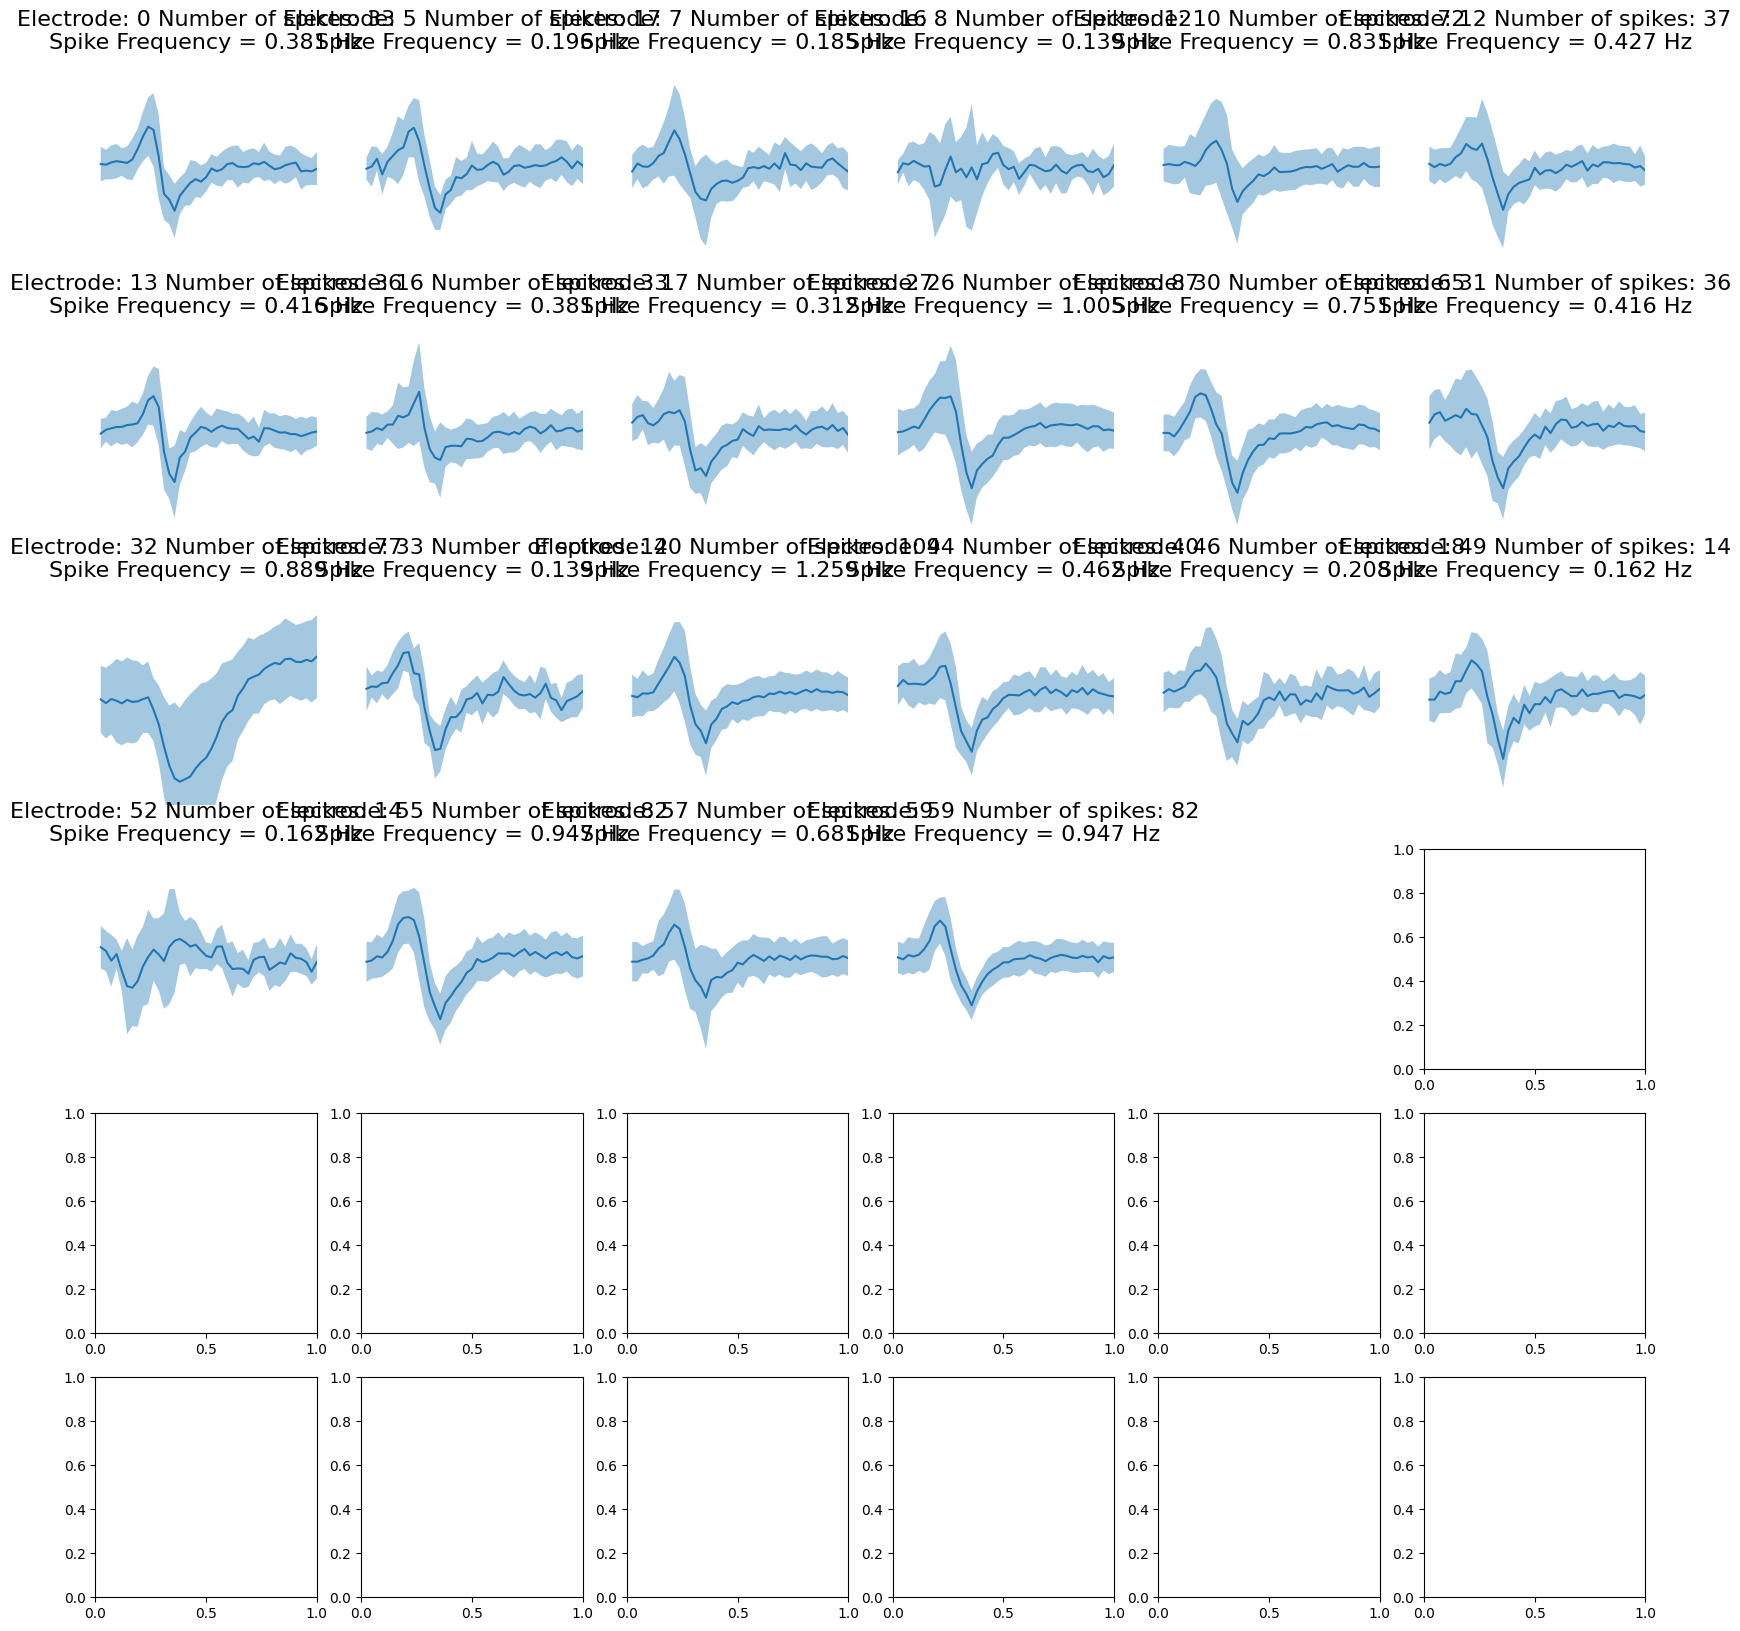

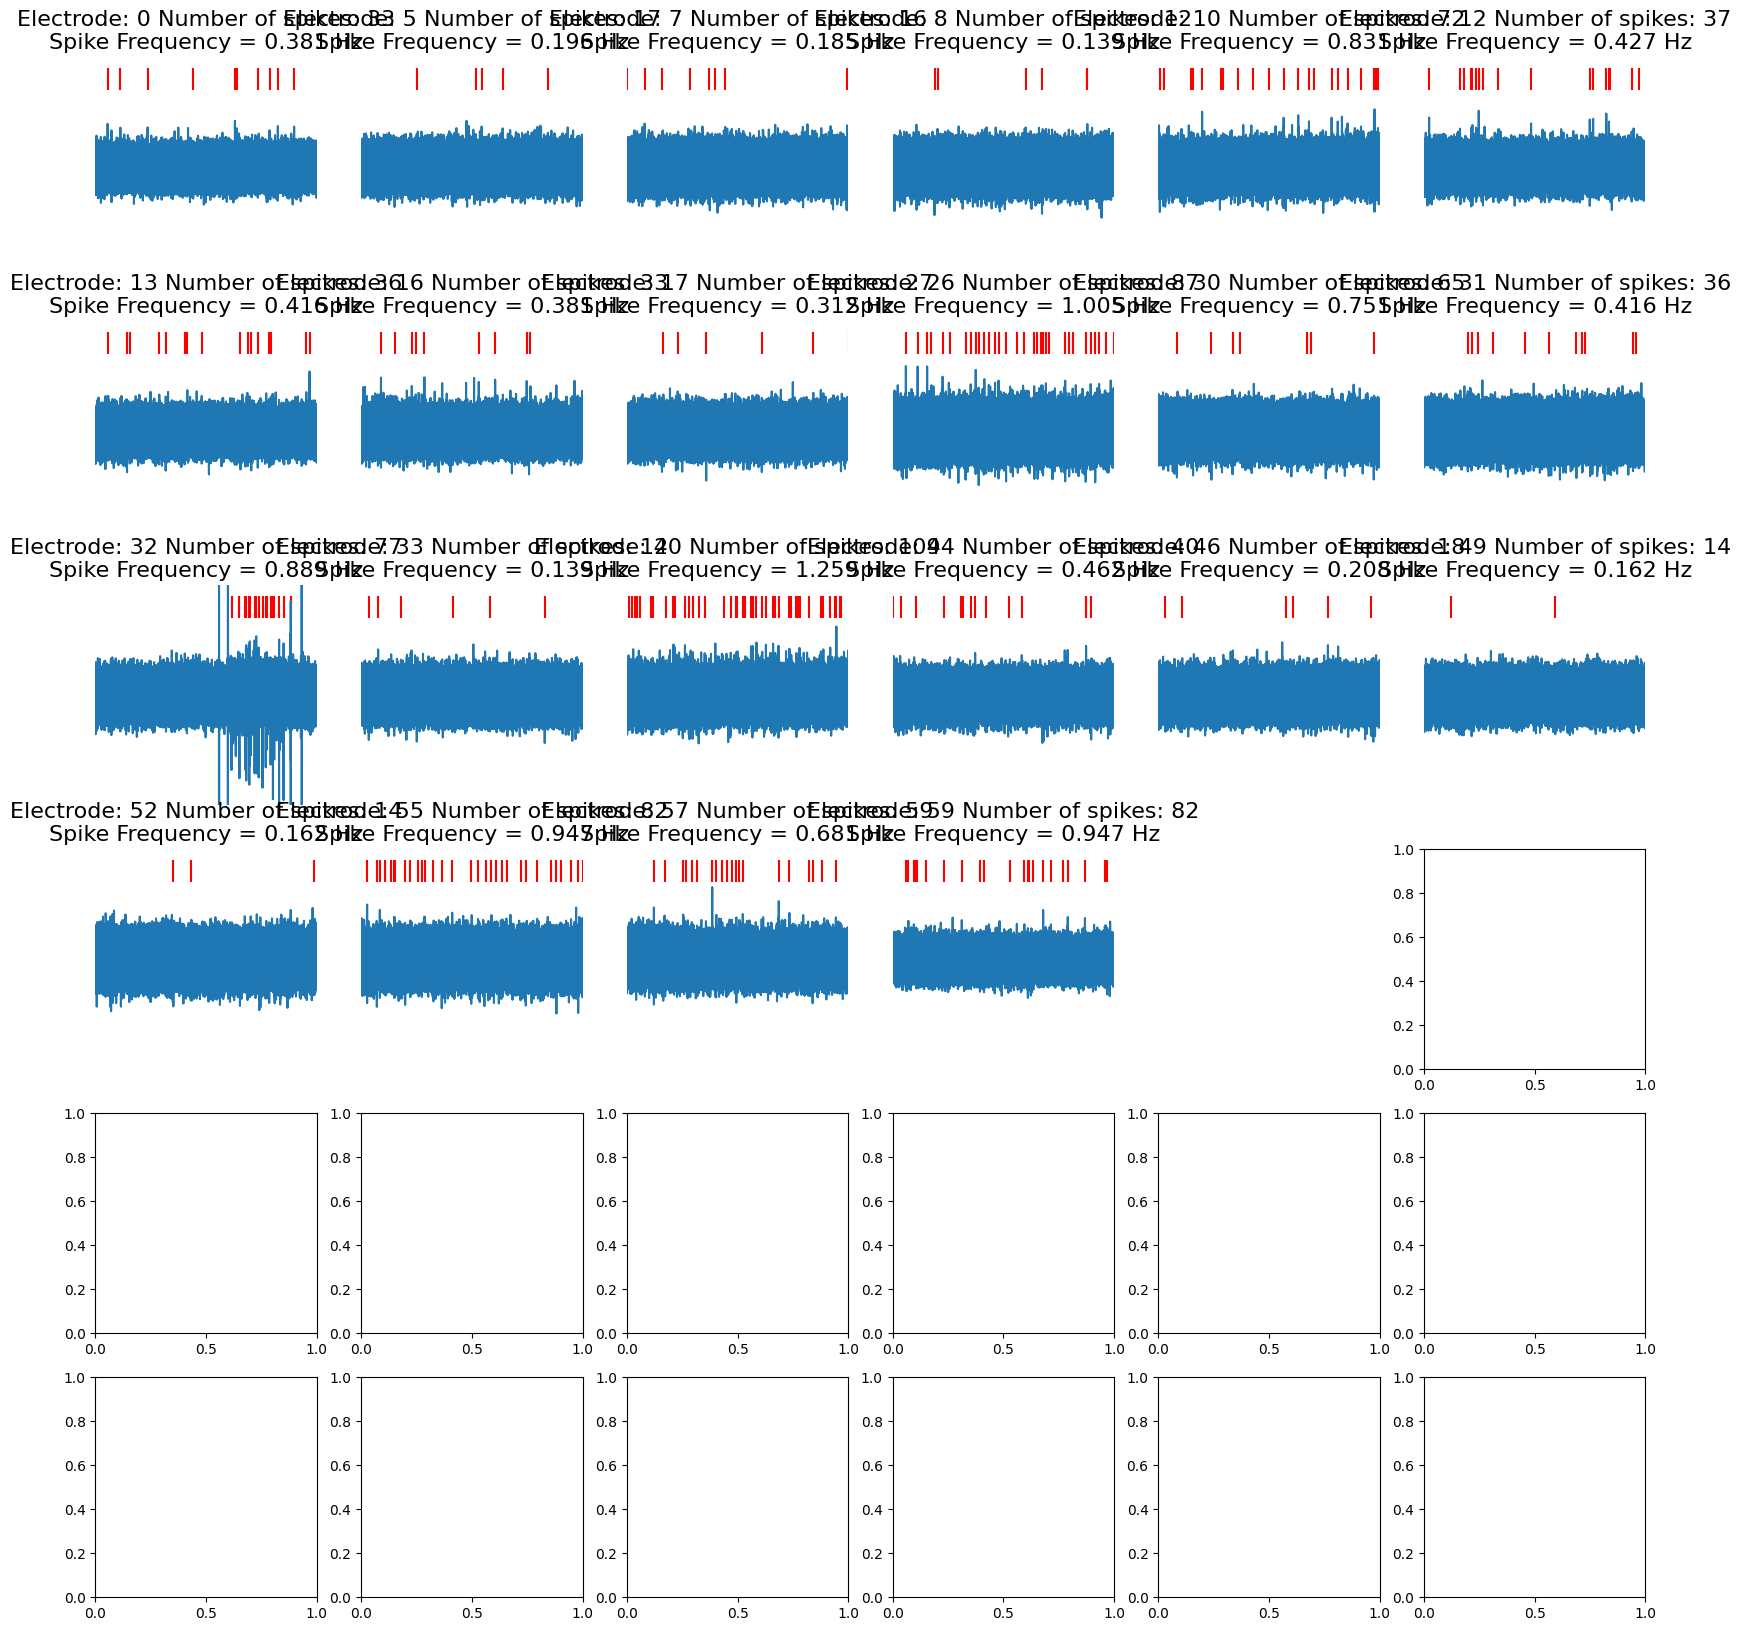

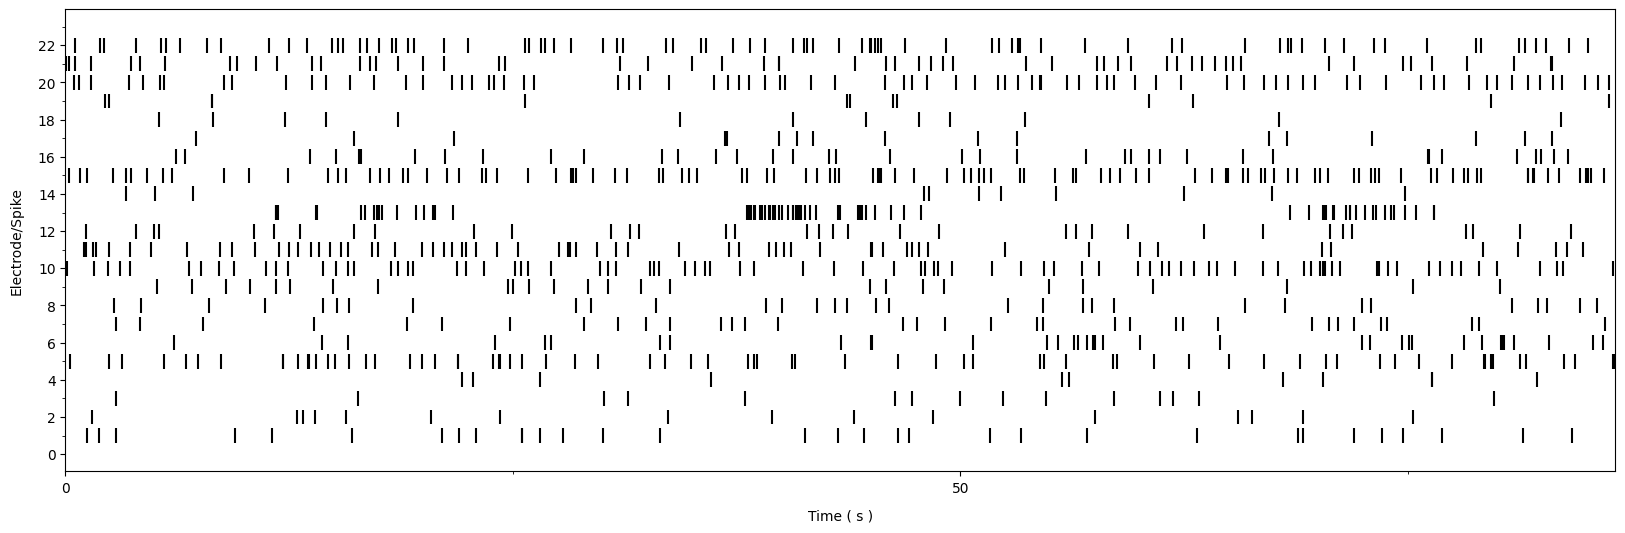

4.789989948272705


In [6]:
from pylab import cm
import matplotlib.font_manager as fm
import matplotlib as mpl

start = time.time()

fig, ax = plt.subplots(6,6, figsize=(20, 20))
#fig.subplots_adjust(hspace = .5, wspace=.5)
ax = ax.ravel()

fig1, ax1 = plt.subplots(6,6, figsize=(20, 20))
#fig1.subplots_adjust(hspace = .5, wspace=.5)
ax1 = ax1.ravel()

fig2, ax2 = plt.subplots(1,1, figsize=(20, 6))


electrode = 0
ts = 1000000*np.arange(0,len(globals()[f"dataextract{electrode}".format(electrode)][:,0])/Fs,1/Fs)
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)
count = 0
for i in range(60):
    electrode = i
    if globals()[f"dataextract{electrode}".format(electrode)].size and np.abs(means).sum(1)[i]>Nmeanslow and np.abs(stds).sum(1)[i]>Nstdslow and np.abs(stds).sum(1)[i]<40000 and len(globals()[f"dataextract{electrode}".format(electrode)].T)>10:
        
        ax[count].plot(ts,means[electrode,:])
        ax[count].fill_between(ts,means[electrode,:]-stds[electrode,:]
                         ,means[electrode,:]+stds[electrode,:],alpha=0.4)
        ax[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 16)
        ax[count].set_ylim(-25,25)
        ax[count].set_xlim(-100,4100)
        ax[count].axis('off')
        
        ax1[count].eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 40,color='red',linelengths = 10)
        ax1[count].plot(t,1e-2*np_analog_stream_0_data[electrode,NN])
        ax1[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 16)
        ax1[count].set_ylim(-50,50)
        ax1[count].set_xlim(50,80)
        ax1[count].axis('off')
        
        ax2.eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 1+1*count,color='black',linelengths = 0.8)
        ax2.set_xlabel('Time ( s )', labelpad=10)
        ax2.set_ylabel('Electrode/Spike', labelpad=10)
        ax2.set_xlim([0,max(t)])
        ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
        ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
        ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
        ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))        
        count = count+1
    ax[count].axis('off')
    ax1[count].axis('off')
plt.show()
fig.savefig('bla.pdf')
fig1.savefig('bla1.pdf')
fig2.savefig('bla2.pdf')

end = time.time()
print(end - start)

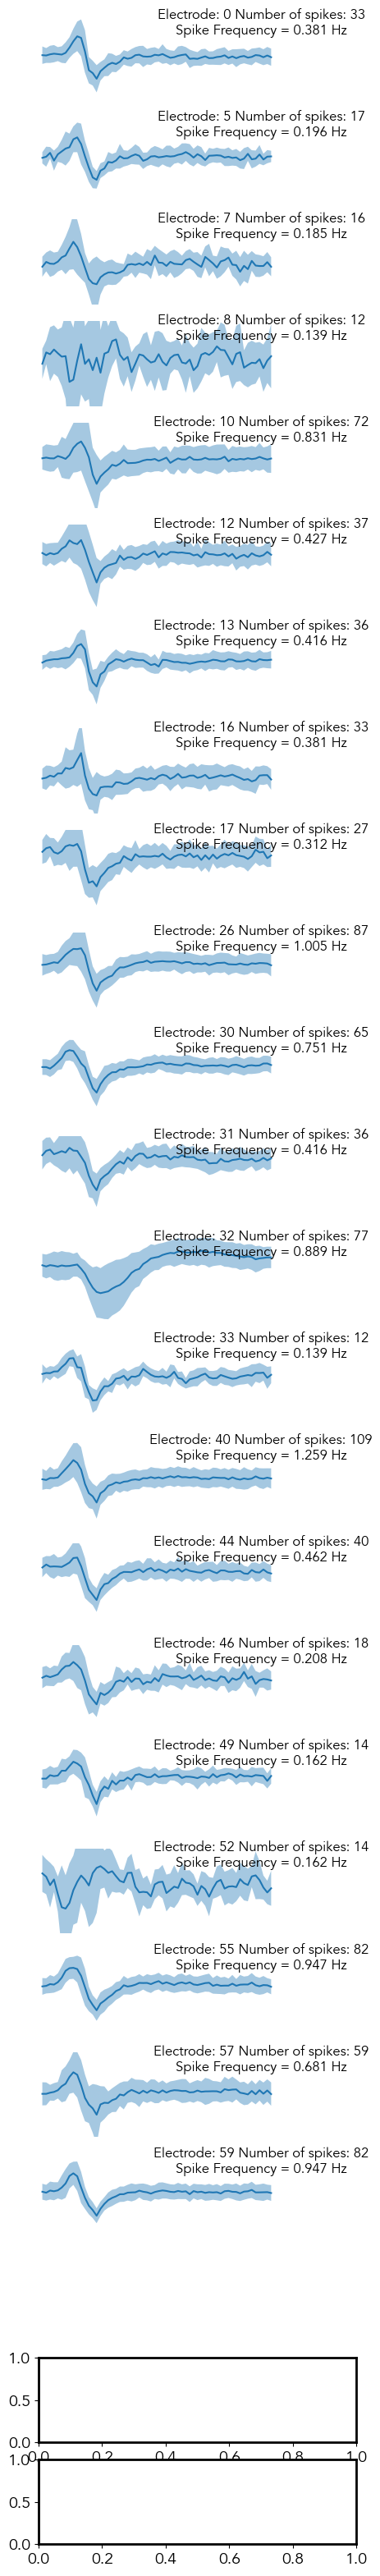

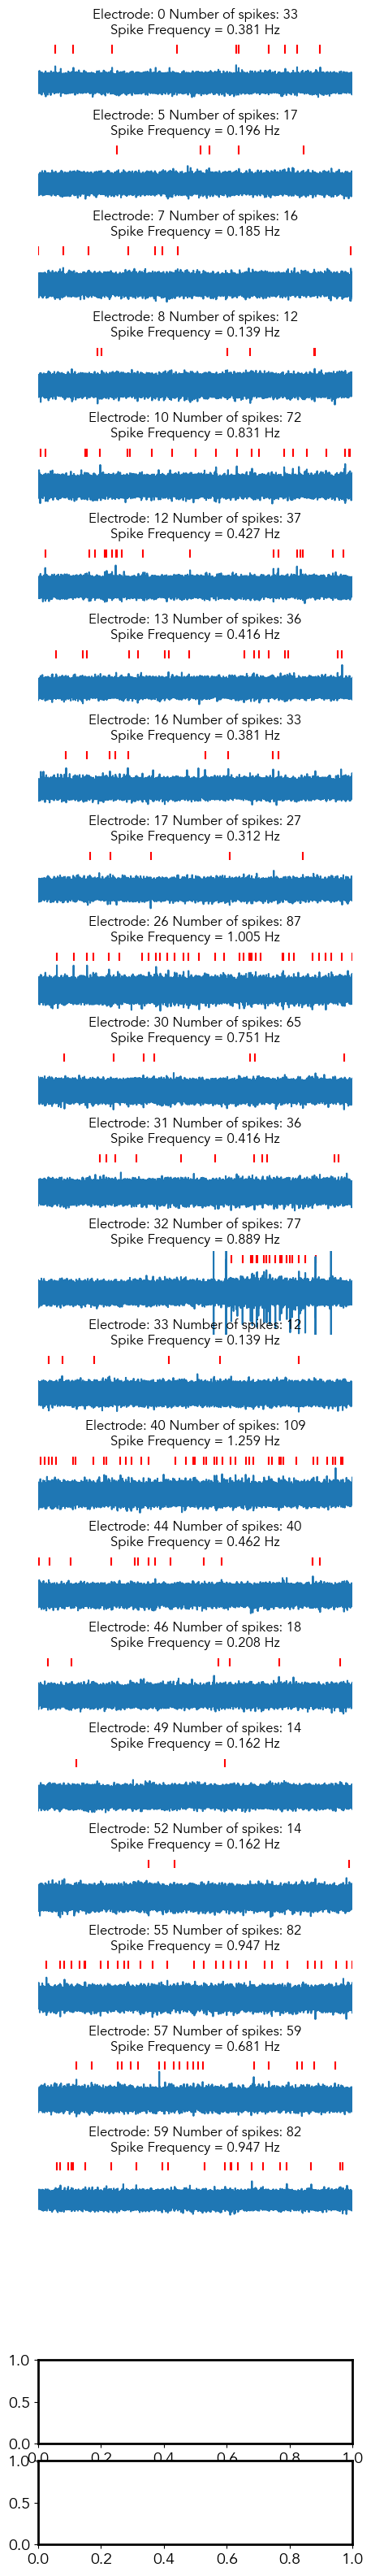

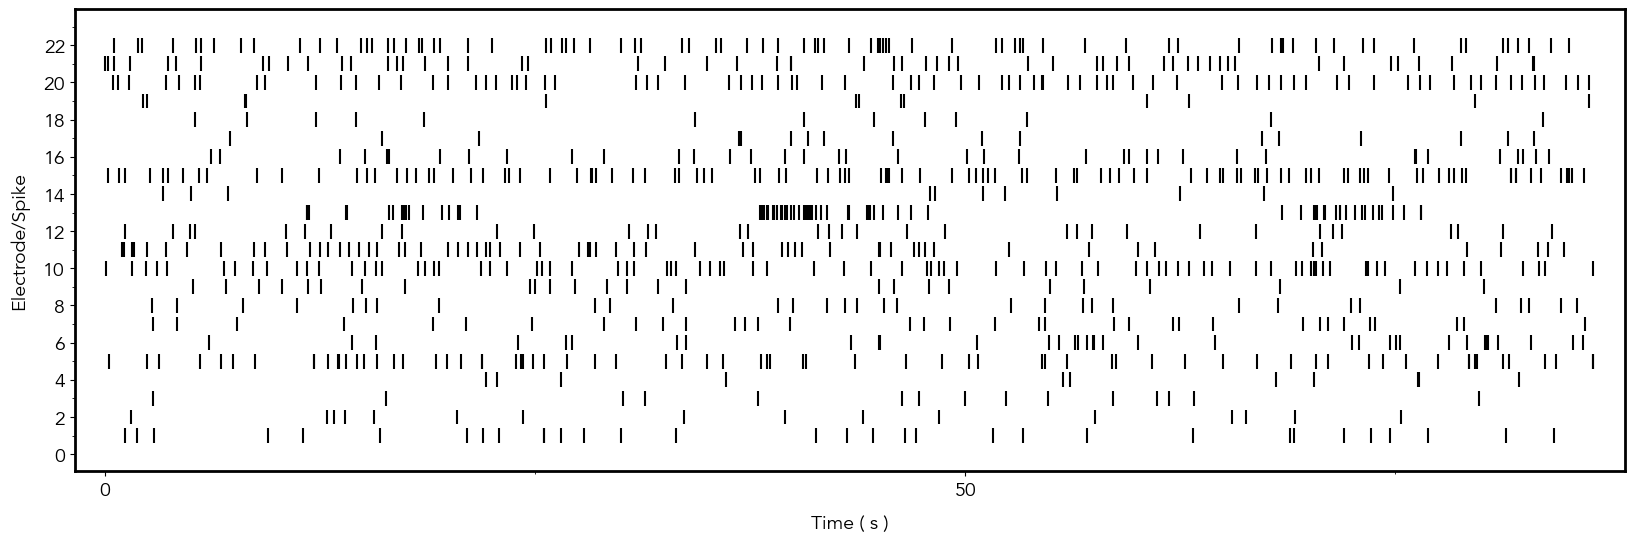

5.34372615814209


In [35]:
from pylab import cm
import matplotlib.font_manager as fm
import matplotlib as mpl

start = time.time()
plotsize2 = 25
fig, ax = plt.subplots(plotsize2,1, figsize=(5, 40))
#fig.subplots_adjust(hspace = .5, wspace=.5)
ax = ax.ravel()

fig1, ax1 = plt.subplots(plotsize2,1, figsize=(5, 40))
#fig1.subplots_adjust(hspace = .5, wspace=.5)
ax1 = ax1.ravel()

fig2, ax2 = plt.subplots(1,1, figsize=(20, 6))


electrode = 0
ts = 1000000*np.arange(0,len(globals()[f"dataextract{electrode}".format(electrode)][:,0])/Fs,1/Fs)
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)
count = 0
for i in range(60):
    electrode = i
    if globals()[f"dataextract{electrode}".format(electrode)].size and np.abs(means).sum(1)[i]>Nmeanslow and np.abs(stds).sum(1)[i]>Nstdslow and np.abs(stds).sum(1)[i]<40000 and len(globals()[f"dataextract{electrode}".format(electrode)].T)>10:
        
        ax[count].plot(ts,means[electrode,:])
        ax[count].fill_between(ts,means[electrode,:]-stds[electrode,:]
                         ,means[electrode,:]+stds[electrode,:],alpha=0.4)
        ax[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',
                            rotation='horizontal',x=0.7,y=0.7,fontsize = 12)
        ax[count].set_ylim(2*min(means[electrode,:]),2*max(means[electrode,:]))
        ax[count].set_xlim(-100,8100)
        ax[count].axis('off')
        
        ax1[count].eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 40,color='red',linelengths = 10)
        ax1[count].plot(t,1e-2*np_analog_stream_0_data[electrode,NN])
        ax1[count].set_title('Electrode: '+str(electrode)+' Number of spikes: '+str(len(globals()[f"dataextract{electrode}".format(electrode)].T))+'\nSpike Frequency = '+str(round(len(globals()[f"dataextract{electrode}".format(electrode)].T)/max(t),3))+' Hz',fontsize = 12)
        ax1[count].set_ylim(-50,50)
        ax1[count].set_xlim(50,80)
        ax1[count].axis('off')
        
        ax2.eventplot(globals()[f"a{electrode}".format(electrode)]/1e4,lineoffsets = 1+1*count,color='black',linelengths = 0.8)
        ax2.set_xlabel('Time ( s )', labelpad=10)
        ax2.set_ylabel('Electrode/Spike', labelpad=10)
        ax2.set_xlim([0-max(t)/50,max(t)+max(t)/50])
        ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
        ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
        ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
        ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))        
        count = count+1
    ax[count].axis('off')
    ax1[count].axis('off')
plt.show()
fig.savefig('bl.pdf')
fig1.savefig('bl1.pdf')
fig2.savefig('bl2.pdf')

end = time.time()
print(end - start)

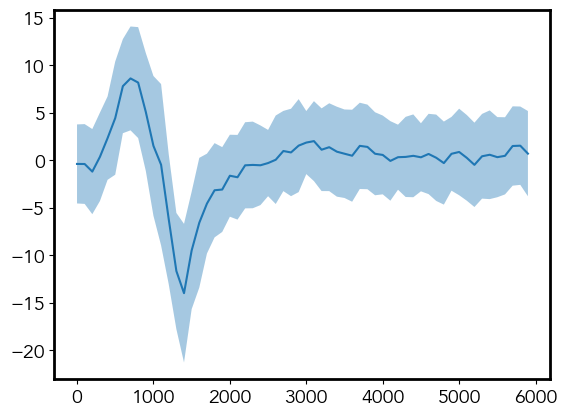

In [8]:
electrode = 30
ts = 1000000*np.arange(0,len(globals()[f"dataextract{electrode}".format(electrode)][:,0])/Fs,1/Fs)

plt.plot(ts,means[electrode,:])
plt.fill_between(ts,means[electrode,:]-stds[electrode,:]
                         ,means[electrode,:]+stds[electrode,:],alpha=0.4)
plt.show()

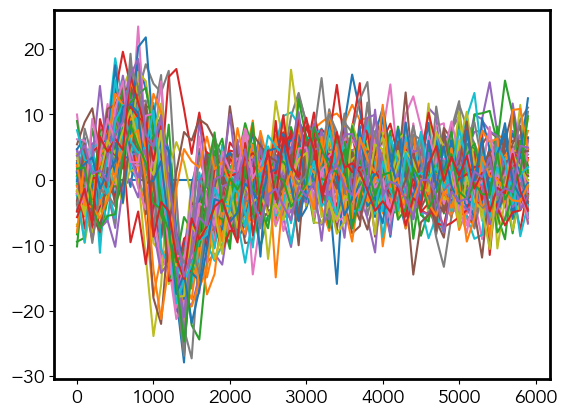

In [9]:
plt.plot(ts,dataextract30)
plt.show()